In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from utils import compute_pca
import os

df = pd.read_csv("breast-cancer.csv")

In [2]:
script_path = '/'
os.system(f'python {script_path}')
!python utils.py

%run utils.py

C:\Users\user\AppData\Local\Temp\ipykernel_8556\506464777.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True, cmap="Blues")


<Axes: >

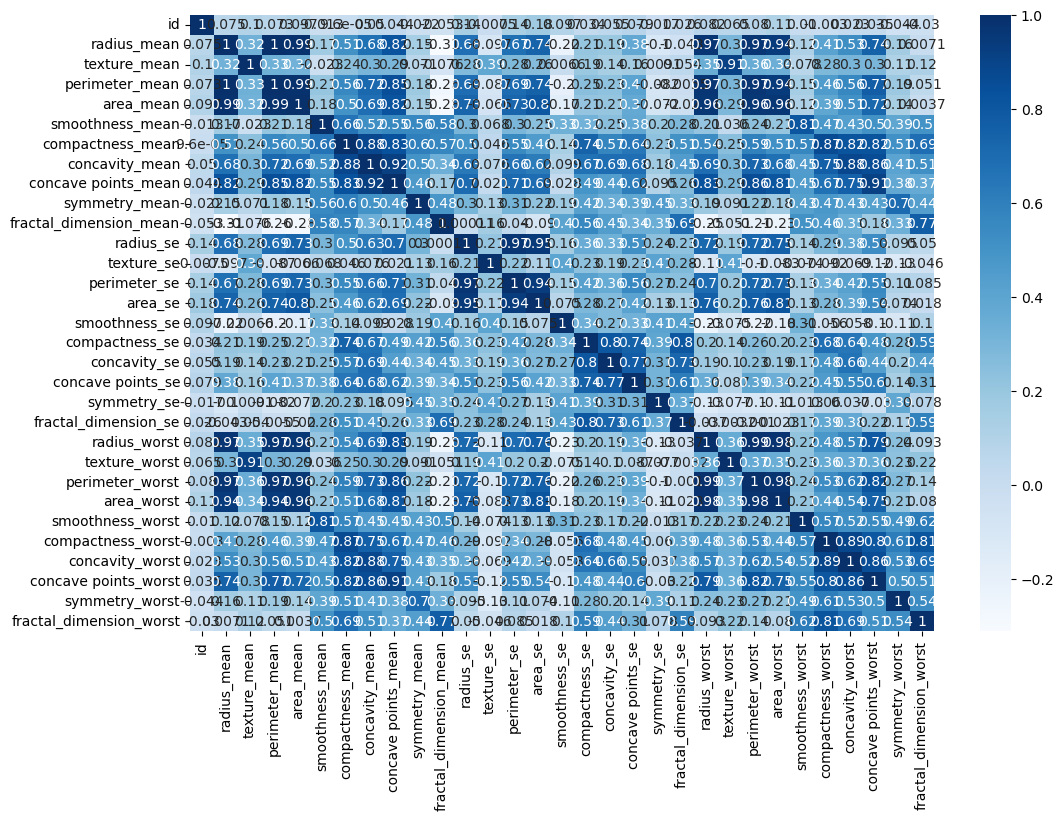

In [3]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(), annot=True, cmap="Blues")

In [4]:
# df.head()
# y = df["diagnosis"]
# X = df.drop(columns=["diagnosis"])
# print(X)
# X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=23)
                                                   
# model = LogisticRegression(random_state=3)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# acc = accuracy_score(y_test,y_pred)
# acc

           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302        17.99         10.38          122.80     1001.0   
1      842517        20.57         17.77          132.90     1326.0   
2    84300903        19.69         21.25          130.00     1203.0   
3    84348301        11.42         20.38           77.58      386.1   
4    84358402        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564    926424        21.56         22.39          142.00     1479.0   
565    926682        20.13         28.25          131.20     1261.0   
566    926954        16.60         28.08          108.30      858.1   
567    927241        20.60         29.33          140.10     1265.0   
568     92751         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

0.3684210526315789

In [5]:
df.head(10)
col_list = df.columns.to_list()
print(type(col_list))
col_list = col_list[2:]
print(col_list)

<class 'list'>
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [6]:
X = df[col_list].to_numpy()
#type(X)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# def compute_pca(X, n_components=2):

#     # mean center the data
#     X_demeaned = X-np.mean(X,axis=0)

#     # calculate the covariance matrix
#     covariance_matrix = np.cov(X_demeaned, rowvar=False)

#     # calculate eigenvectors & eigenvalues of the covariance matrix
#     eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix)

#     # sort eigenvalue in increasing order
#     idx_sorted = np.argsort(eigen_vals)
    
#     # reverse the order so that it's from highest to lowest.
#     idx_sorted_decreasing = np.flip(idx_sorted)

#     # sort the eigen values by idx_sorted_decreasing
#     eigen_vals_sorted = [eigen_vals[i] for i in idx_sorted_decreasing]

#     # sort eigenvectors using the idx_sorted_decreasing indices
#     eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

#     # select the first n eigenvectors
#     eigen_vecs_subset = eigen_vecs_sorted[:,0:n_components]

#     # transform the data by multiplying the transpose of the eigenvectors with the transpose of the de-meaned data
#     # Then take the transpose of that product.
#     X_reduced = (np.dot(eigen_vecs_subset.T,X_demeaned.T)).T

#     ### END CODE HERE ###

#     return X_reduced

In [8]:
data = compute_pca(X, 4)
data

array([[1160.1425737 , -293.91754364,   48.57839763,    8.71197531],
       [1269.12244319,   15.63018184,  -35.39453423,  -17.86128323],
       [ 995.79388896,   39.15674324,   -1.70975298,   -4.1993401 ],
       ...,
       [ 314.50175618,   47.55352518,  -10.44240718,    9.77188104],
       [1124.85811531,   34.12922497,  -19.74208742,   23.66088144],
       [-771.52762188,  -88.64310636,   23.88903189,   -2.54724855]])

In [9]:
df_new = pd.DataFrame(data, columns=["Col1","Col2","Col3","Col4"])
df_new = df_new.assign(Target = df["diagnosis"])


In [10]:
y = df_new["Target"]
X = df_new.drop(columns=["Target"])
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=23)
                                                   
model = LogisticRegression(random_state=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.9590643274853801

In [12]:
pickle.dump(model, open('model.pkl','wb'))